# More Complex Fitting

*developed by Pauline Arriaga and Shashank Gowda*

So far, we have been doing fitting using the least squares method but have not been paying close attention to the guess parameters. In some cases (such as low-order polynomials), the guess parameters do not have to be particularly close for least squares to find an answer. When we get to a fit that has multiple solutions or *degenerate* solutions, we will need to be more careful about picking initial parameters. Take for example a cosine function, which we will be fitting in this lab. The solutions for a fit to a dataset of a cosine function are degenerate since a solution of 

$y=\cos(\omega t)$

is completely equivalent to a solution of


$y=\cos(\omega t + 2 \pi)$

When there are degenerate solutions, we need to pay specific attention to what our initial parameters are. For our data, we will be fitting damped oscillator systems, which is a product of a sine or cosine function as well as an exponential. Finding best fits becomes easier the fewer parameters we use, so we will start in our fit by finding parameters for a small amount of data where we can fit an undamped function

$y = A \cos(\omega t + \phi)$

Fitting for omega, A, and phi, and then we will use those fitted parameters as guess parameters for a damped function

$y = A \cos(\omega t + \phi) e^{-t / \tau}$



## Data Preparation

Let's start by reading in our data

In [1]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [ ]:
import numpy as np

read_in_array = np.loadtxt('/content/drive/My Drive/4cm_150g.csv', delimiter = ',', skiprows = 1)

Let's extract the positions and times

In [ ]:
# Get the zeroeth column
time_data_array = read_in_array[:, 0]

# convert from ms to s
time_data_array = time_data_array/1000

In [ ]:
# Get the fourth column, the second and third column in the data are accelerations from the accelerometer sensor
position_data_array = read_in_array[:, 3]

# convert from mm to m
position_data_array=position_data_array/1000

Now let's plot the positions and times to see what our data looks like

Text(0, 0.5, 'Distance (m)')

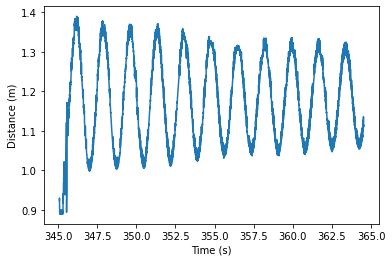

In [ ]:
# Test plot
import matplotlib.pyplot as plt
plt.plot(time_data_array, position_data_array)
plt.xlabel('Time (s)')
plt.ylabel('Distance (m)')

Now, we will employ our first step of fitting an undamped cosine function to a small portion of data. If we pick a small portion of our dataset, then the effects of the damping will be small. Let's plot the position array vs index (as opposed to vs time) to look at what indices we want to cut them off at

Text(0.5, 0, 'Index')

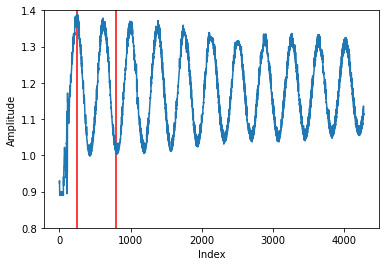

In [ ]:
# Plot vs index to see where we should cut off the data

plt.plot(position_data_array)
plt.vlines(250, .8, 1.4, color = 'red')
plt.vlines(800, .8, 1.4, color = 'red')
plt.ylim([.8, 1.4])
plt.ylabel('Amplitude')
plt.xlabel('Index')

From above, I will make an arbitrary cut to get 1.5 oscillations. Let's try and get the first cut as close to the peak of an oscillation as possible. Visually, we will take a cut around 250 - 800. Now we index our arrays so that we have positions vs times of just that data region

Let's clip a little more off. We will also subtract off the zeroeth of the clipped time data so that the time starts at 0 rather than at 345 seconds.

In [ ]:
position_data_array_clip1 = position_data_array[250:800]
time_data_array_clip1 = time_data_array[250:800]
time_data_array_clip1 = time_data_array_clip1 - time_data_array_clip1[0]

Now let's make another plot. We now want to make some estimates for the parameters that we will be fitting for, A, omega, y offset and phi. Because we cut the data at a peak, we can safely assume that phi is close to zero.

Visually we can see what the y offset is (around 1.2 m), because it's the midline of the oscillation. 

We can take the difference between the midpoint and peak of the curve which gives us 1.4-1.2, around 0.2 m. 

Finally, we will find the period, which we will use to find the frequency. In red lines, we have plotted the locations of two valleys,  one at 0.8 s and the other at 2.5 s . We then use the relation

$\omega = \frac{2\pi}{T}$

To estimate the initial frequency


Text(0, 0.5, 'Amplitude')

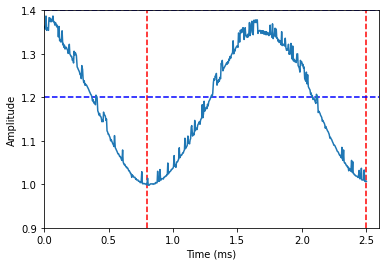

In [ ]:
plt.plot(time_data_array_clip1, position_data_array_clip1)
plt.vlines(.8, .9, 1.4, color = 'red', linestyle = 'dashed')
plt.vlines(2.5, .9, 1.4, color = 'red', linestyle = 'dashed')

plt.hlines(1.2,0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.hlines(1.4,0, 2.6,  color = 'blue', linestyle = 'dashed')
plt.xlim([0, 2.6])
plt.ylim([.9, 1.4])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

Now let's make the usual functions that take parameters and return the function or residuals. The parameters will be a, the amplitude, omega, the angular frequency, phi, the phase, and offset, the vertical y offset of the function (since the function does not center around 0).

In [ ]:
from scipy.optimize import least_squares

guess_amplitude = .2 
guess_omega = 2 * np.pi / (2.5 - .8)
guess_offset = 1.2
guess_phi = 0.2

guess_parameters = [guess_amplitude, guess_omega, guess_offset, guess_phi]

In [ ]:
def cos_fit_fun_1(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  y = a * np.cos(omega * time + phi) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_1(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Now let's use the parameters we guessed from above.

Now we need to test our guess parameters. We can convenienty take the guess parameter array and plug it straight into our fitting function which will give us the theoretical function. We can see that guess parameters are not exact, but probably close enough for least squares to find the solution

Text(0, 0.5, 'Position (m)')

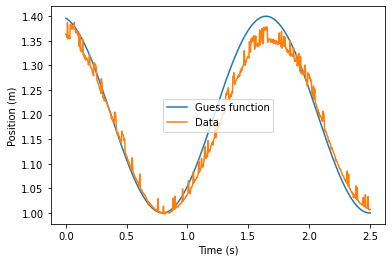

In [ ]:
theoretical_guess_function = cos_fit_fun_1(guess_parameters, time_data_array_clip1)
plt.plot(time_data_array_clip1, theoretical_guess_function, label='Guess function')
plt.plot(time_data_array_clip1, position_data_array_clip1, label = 'Data')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Now let's try fitting. We will use the least squares algorithm.

In [ ]:
from scipy.optimize import least_squares

res_lsq = least_squares(get_residuals, guess_parameters, args=(position_data_array_clip1,time_data_array_clip1))

Best Amplitude: 0.1810614514488454
Best Omega: 3.66717826409176
Best offset: 1.1832405211546648
Best Phi: 0.10070377986846134


Text(0, 0.5, 'Position (m)')

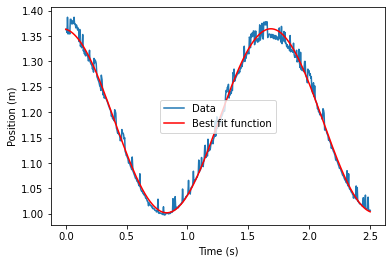

In [ ]:
best_parameters = res_lsq['x']
fitted_function = cos_fit_fun_1(best_parameters, time_data_array_clip1)
plt.plot(time_data_array_clip1, position_data_array_clip1, label = 'Data')
plt.plot(time_data_array_clip1, fitted_function, color = 'red', label='Best fit function')
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

The fit looks pretty good, so we will see if we can find a solution that fits to a larger range of data. Let's make another clip of the data. Viually we'll try and cut a larger part of the data. Again, we will subtract off the zeroeth time point so that our time data starts at 0 s. 

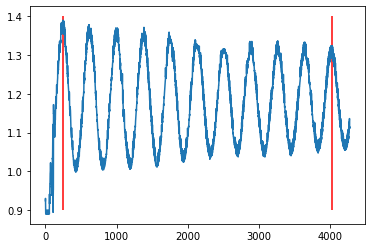

In [ ]:
# Plot vs index to see where we should cut off the data

plt.plot(position_data_array)
plt.vlines(250, .9, 1.4, color = 'red')
plt.vlines(4025, .9, 1.4, color = 'red')
#plt.ylim()

In [ ]:
position_data_array_clip2 = position_data_array[250:]
time_data_array_clip2 = time_data_array[250:]
time_data_array_clip2 = time_data_array_clip2 - time_data_array_clip2[0]

Now we'll play a very important trick of using the best parameters from the previous fit as the guess parameters or *seed parameters* for our new fit. Let's use the best parameters from the previous fit and look at what it looks like when we plot it with the whole range of data.

Text(0, 0.5, 'Position (m)')

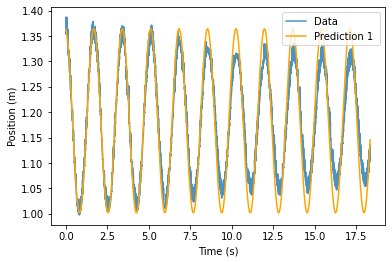

In [ ]:
guess_parameters = best_parameters
theoretical_guess_function = cos_fit_fun_1(guess_parameters, time_data_array_clip2)
plt.plot(time_data_array_clip2, position_data_array_clip2, alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2, theoretical_guess_function, color='orange', label = 'Prediction 1 ')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

In [ ]:
guess_parameters = best_parameters
res_lsq = least_squares(get_residuals, guess_parameters, args=(position_data_array_clip2,time_data_array_clip2))

Below we plot the fit for the second iteration of the fit. We see that we get a much stronger fit in the later data point, but at the cost of a worse fit in earlier data points. We already know that the best fit is going to be the product of an exponential times our cosine function, so we can safely assume that the change in amplitude is due to the exponential decay.

Best Amplitude: 0.1489133844747502
Best Omega: 3.65317420708196
Best offset: 1.1813257411874538
Best Phi: 0.10005692472443731


Text(0, 0.5, 'Position (m)')

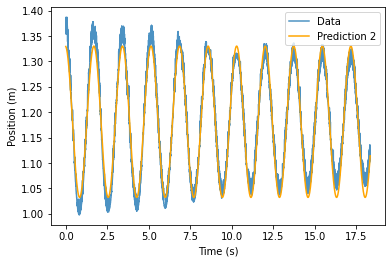

In [ ]:
best_parameters = res_lsq['x']
fitted_function = cos_fit_fun_1(best_parameters, time_data_array_clip2)
plt.plot(time_data_array_clip2, position_data_array_clip2, alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2, fitted_function, color = 'orange', label='Prediction 2')
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Let's make a new function for our residual function and damped function. We now add the new parameter tau. 

In [ ]:
def cos_fit_fun_damped(parameters, time):
  a = parameters[0]
  omega = parameters[1]
  offset = parameters[2]
  phi = parameters[3]
  tau = parameters[4]
  y = a * np.cos(omega * time + phi) * np.exp(-time / tau) + offset
  return y

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

Now we need to make a good guess of the tau factor. Let's consider what the exponential term does. 


We can consider the damped equation of motion as

$x(t) = oscillation(t) * exponential(t)$

where $exponential(t) = e^{-t / \tau}$.

Let's look at a specific example where we keep the oscillation to a simple cos with with an amplitude of 1 and $\tau = 5$

Text(0, 0.5, 'Height')

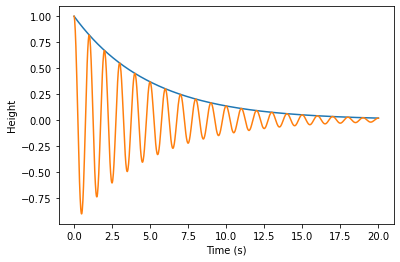

In [ ]:
time_axis = np.linspace(0, 20., 1000)
oscillation = np.cos(2. * np.pi * time_axis)
exponential = np.exp(-time_axis / 5.)
plt.plot(time_axis, exponential)
plt.xlabel('Time (s)')
plt.plot(time_axis, exponential * oscillation)
plt.ylabel('Height')

(-0.5, 7.0)

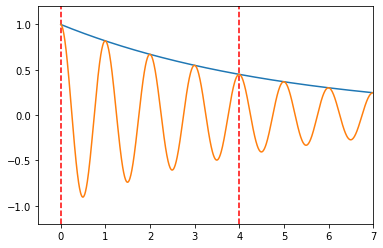

In [ ]:
time_axis = np.linspace(0, 7., 1000)
oscillation = np.cos(2. * np.pi * time_axis)
exponential = np.exp(-time_axis / 5.)
plt.plot(time_axis, exponential)
plt.plot(time_axis, exponential * oscillation)
plt.vlines(0., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.vlines(4., -1.2, 1.2, color = 'red', linestyle = 'dashed')
plt.ylim([-1.2, 1.2])
plt.xlim([-0.5, 7])

The maximum value of the cosine wave at every oscillation has an amplitude of 1. We can then figure out what the effect of the exponential is by looking at the value the peak at different points. From the 1st to 4th oscillation (at t=4), the attentuation is 

$\frac{y(0)}{y(4)} = \frac{1}{e^{4 / \tau}} $

You can convince yourself that even if the cosine wave has an amplitude a, we have the same relation. Assuming that a time = t and 0 that the cosine is at a maximum then, 

$e^{-t / \tau} = \frac{y(t)}{y(0)}$

On pen and paper, show that:

$\tau = \frac{t}{\ln\left( \frac{y(0)}{y(t)} \right)}$


Best offset: 1.1813257411874538


Text(0, 0.5, 'Position (m)')

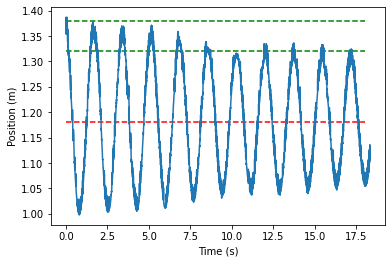

In [ ]:
best_parameters = res_lsq['x']
plt.plot(time_data_array_clip2, position_data_array_clip2)

# To see the offset 
plt.hlines(best_parameters[2],-0, 18, color = 'red', linestyle = 'dashed')
print('Best offset: ' + str(best_parameters[2]))

# To see the peak of the first cycle and the 11th cycle
plt.hlines([1.32, 1.38], 0, 18, color = 'green', linestyle = 'dashed')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

$y(t = 17.5) \approx 1.32$

$y(t = 0) \approx 1.38$

Subtracting off the offset

$y_{offset}(t=0) \approx .2$


$y_{offset}(t=17.5) \approx .14$

$ \tau = \frac{t}{ \ln\left( \frac{ y(0) }{ y(t)}\right) } $




In [ ]:
def find_tau(t, y_t, y_0):
  nom = t
  denom = np.log(y_0 / y_t)
  tau = nom / denom
  print('Tau is ' + str(tau))
  
find_tau(17.5, .14, .2)

Tau is 49.06428191099975


In [ ]:
guess_parameters = np.append(best_parameters, 49.0)
print(guess_parameters)

[ 0.14891338  3.65317421  1.18132574  0.10005692 49.        ]


Text(0, 0.5, 'Position (m)')

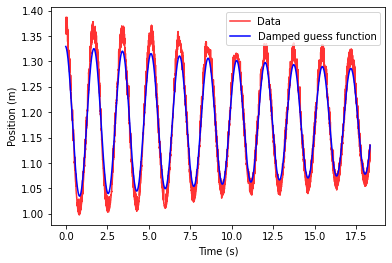

In [ ]:
theoretical_guess_function = cos_fit_fun_damped(guess_parameters, time_data_array_clip2)
plt.plot(time_data_array_clip2, position_data_array_clip2, color = 'red', alpha = 0.8, label = 'Data')
plt.plot(time_data_array_clip2, theoretical_guess_function, color = 'blue', label = 'Damped guess function')
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')

Best Amplitude: 0.18641453639425143
Best Omega: 3.6523339047291388
Best offset: 1.1809914979795118
Best Phi: 0.10775946049259798
Best Tau: 39.50548798205275


Text(0, 0.5, 'Position (m)')

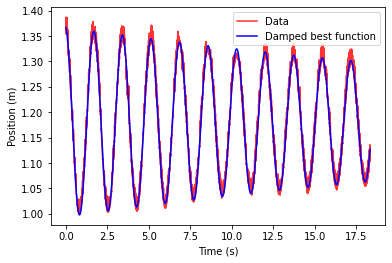

In [ ]:
def get_residuals(parameters, position_data, time_data):
  theoretical_function = cos_fit_fun_damped(parameters, time_data)
  residuals = np.abs(theoretical_function - position_data)
  return residuals

res_lsq = least_squares(get_residuals, guess_parameters, args=(position_data_array_clip2,time_data_array_clip2))
best_parameters = res_lsq['x']
fitted_function = cos_fit_fun_damped(best_parameters, time_data_array_clip2)
plt.plot(time_data_array_clip2, position_data_array_clip2, color='red',alpha = 0.8, label='Data')
plt.plot(time_data_array_clip2, fitted_function, color = 'blue', label = 'Damped best function' )
print('Best Amplitude: ' + str(best_parameters[0]))
print('Best Omega: ' + str(best_parameters[1]))
print('Best offset: ' + str(best_parameters[2]))
print('Best Phi: ' + str(best_parameters[3]))
print('Best Tau: ' + str(best_parameters[4]))
plt.legend()
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')